In [2]:
from pyteomics import mzml
import psims
import lxml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyteomics import pylab_aux as pa, usi

In [30]:
file_path = '..\\data\\2015-05-19_MRC5_a.mzML'

0
1
Precursor m/z: 412.771563708782
Number of fragment peaks: 16


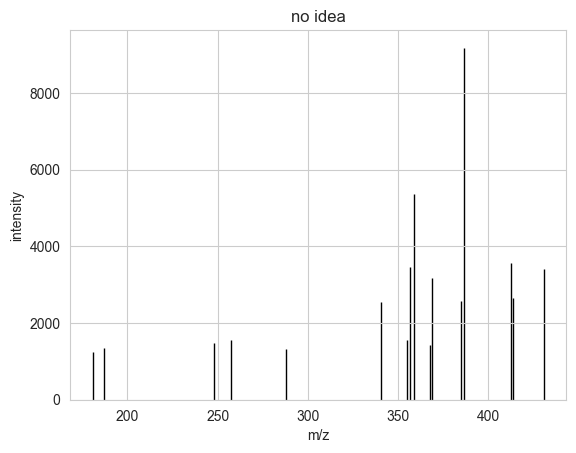

In [54]:
with mzml.MzML(file_path) as reader:
    for spectrum in reader:
        print(spectrum["index"])
        # Look for an MS/MS spectrum (ms level 2)
        if spectrum.get('ms level') == 2:
            # Extract relevant information
            mz_array = spectrum['m/z array']
            intensity_array = spectrum['intensity array']
            precursor_mz = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['selected ion m/z']

            print(f"Precursor m/z: {precursor_mz}")
            print(f"Number of fragment peaks: {len(mz_array)}")


            plotting_dict = {'m/z array': mz_array, 'intensity array': intensity_array}
            peptide = ("C")
            # 'CHAANPNGR'

            pa.annotate_spectrum(plotting_dict, peptide, precursor_charge=2, backend='default',
                ion_types='aby', title="no idea")
            plt.show()

            # Stop after first MS2 spectrum
            break


In [55]:
spectrum

{'index': 1,
 'id': 'controllerType=0 controllerNumber=1 scan=2',
 'defaultArrayLength': 16,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 120.0 m/z,
       'scan window upper limit': 860.0 m/z}]},
    'scan start time': 0.010054731 minute,
    'mass resolving power': 17500.0,
    'filter string': 'FTMS + c NSI d Full ms2 412.77@hcd27.00 [120.00-860.00]',
    'preset scan configuration': 2.0,
    'ion injection time': 50.000000745058 millisecond,
    '[Thermo Trailer Extra]Monoisotopic M/Z:': 0.0}],
  'no combination': ''},
 'precursorList': {'count': 1,
  'precursor': [{'spectrumRef': 'controllerType=0 controllerNumber=1 scan=1',
    'isolationWindow': {'isolation window target m/z': 412.771563708782 m/z,
     'isolation window lower offset': 0.800000011921 m/z,
     'isolation window upper offset': 0.800000011921 m/z,
     'ms level': 1},
    'selectedIonList': {'count': 1,
     'selectedIon': [{'selected ion m/z'

<Axes: xlabel='m/z', ylabel='intensity'>

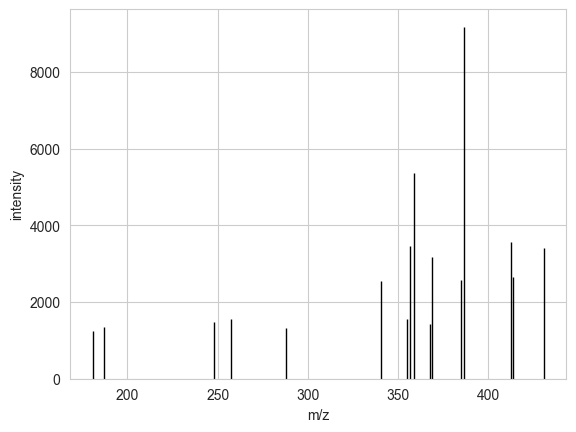

In [21]:
pa.plot_spectrum(plotting_dict)

In [24]:
with mzml.MzML(file_path) as reader:
    # Count spectra
    num_spectra = sum(1 for _ in reader)
    print(f"Number of spectra: {num_spectra}")

    # Reset reader and inspect first few spectra
    reader.reset()
    for i, spectrum in enumerate(reader):
        print(f"\nSpectrum {i+1}:")
        print(f"ID: {spectrum.get('id')}")
        print(f"MS level: {spectrum.get('ms level')}")
        print(f"m/z array (first 5): {spectrum['m/z array'][:5]}")
        print(f"intensity array (first 5): {spectrum['intensity array'][:5]}")
        if i == 4:  # show first 5 spectra
            break


Number of spectra: 31282

Spectrum 1:
ID: controllerType=0 controllerNumber=1 scan=1
MS level: 1
m/z array (first 5): [396.02452691 396.02639582 396.02826475 396.03013369 400.24810388]
intensity array (first 5): [0. 0. 0. 0. 0.]

Spectrum 2:
ID: controllerType=0 controllerNumber=1 scan=2
MS level: 2
m/z array (first 5): [180.77694702 186.99243164 247.72344971 257.27392578 287.69580078]
intensity array (first 5): [1240.1529541  1358.31982422 1477.13500977 1549.75842285 1326.09143066]

Spectrum 3:
ID: controllerType=0 controllerNumber=1 scan=3
MS level: 2
m/z array (first 5): [135.10839844 135.11817932 135.47593689 170.59277344 197.29083252]
intensity array (first 5): [1399.22961426 1630.14685059 1313.6998291  1507.44543457 1736.26367188]

Spectrum 4:
ID: controllerType=0 controllerNumber=1 scan=4
MS level: 2
m/z array (first 5): [158.2485199  192.25003052 476.18200684 521.35595703 709.54302979]
intensity array (first 5): [1790.96032715 2108.24975586 1993.62670898 1881.46984863 2475.0791

In [31]:
with mzml.MzML(file_path, use_index=True) as reader:
    spectrum_id = 'controllerType=0 controllerNumber=1 scan=1'  # example
    spectrum = reader[spectrum_id]
    mz_array = spectrum['m/z array']
    intensity_array = spectrum['intensity array']
    plotting_dict = {'m/z array': mz_array, 'intensity array': intensity_array}


<Axes: title={'center': 'MS1'}, xlabel='m/z', ylabel='intensity'>

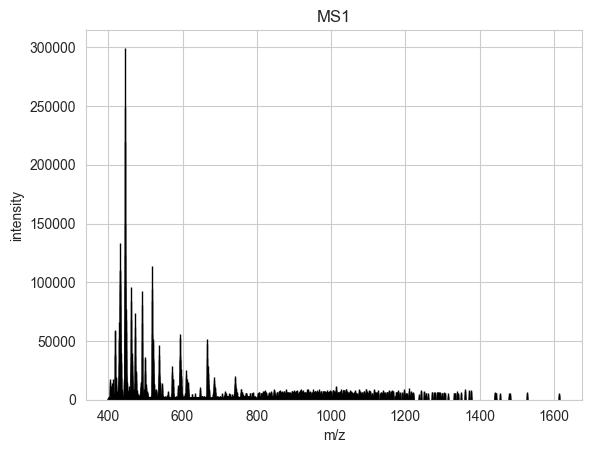

In [33]:
pa.plot_spectrum(plotting_dict,title= "MS1")

# mapping ids tsv


In [47]:
df = pd.read_csv('../data/multiSampleDB_mapping_ids.tsv', sep='\t', header=0)

In [49]:
df.head()

,sample,pipeline_branch,sequence_md5,original_fasta_header,additional_info
0,MRC5,VEP:Inframe,ddd780504d4f3648b293c8f5b5d09756,"VEP:Inframe:ENSG00000000457,ENST00000367770,VA...",NaN
1,MRC5,VEP:Inframe,adc553d338029cdde6008b0a87a8d5f6,"VEP:Inframe:ENSG00000000457,ENST00000367771,VA...",NaN
2,MRC5,VEP:Inframe,ddd780504d4f3648b293c8f5b5d09756,"VEP:Inframe:ENSG00000000457,ENST00000367772,VA...",NaN
3,MRC5,VEP:Inframe,fc5d4bbaa634f0d6e4d05f6b79d8ec2a,"VEP:Inframe:ENSG00000000457,ENST00000423670,VA...",NaN
4,MRC5,VEP:Inframe,4583fc2573a3a9ce3719c2000234dc16,"VEP:Inframe:ENSG00000000971,ENST00000359637,VA...",NaN


In [52]:
df[df["sequence_md5"]=="ddd780504d4f3648b293c8f5b5d09756"]

,sample,pipeline_branch,sequence_md5,original_fasta_header,additional_info
0,MRC5,VEP:Inframe,ddd780504d4f3648b293c8f5b5d09756,"VEP:Inframe:ENSG00000000457,ENST00000367770,VA...",NaN
2,MRC5,VEP:Inframe,ddd780504d4f3648b293c8f5b5d09756,"VEP:Inframe:ENSG00000000457,ENST00000367772,VA...",NaN


In [37]:
len(df)

257142

In [40]:
from io import StringIO
TESTDATA = StringIO(df["original_fasta_header"].iloc[6])
df1 = pd.read_csv(TESTDATA).to_dict()

In [42]:
df1

{'VEP:Inframe:ENSG00000000971': {},
 'ENST00000367429': {},
 'VAR1': {},
 '1_196685238_-/TGAAACCTTGTGATTATCCAGACATTAAACATGGAGGTCTATATCATGAGAATATGC': {},
 '1039-1040': {},
 'ttg964-965tTGAAACCTTGTGATTATCCAGACATTAAACATGGAGGTCTATATCATGAGAATATGCtg': {},
 'L322LKPCDYPDIKHGGLYHENML': {},
 'splice_region_variant_inframe_insertion': {},
 'known_variant_ID:-': {},
 'IMPACT=MODERATE;STRAND=1;VARIANT_CLASS=insertion;SYMBOL=CFH;SYMBOL_SOURCE=HGNC;HGNC_ID=HGNC:4883;BIOTYPE=protein_coding;CANONICAL=YES;MANE_SELECT=NM_000186.4;TSL=1;APPRIS=P2;CCDS=CCDS1385.1;ENSP=ENSP00000356399;SWISSPROT=P08603.248;TREMBL=A0A024R962.62;UNIPARC=UPI000013C4D1;GENE_PHENO=1;DOMAINS=PDB-ENSP_mappings:1haq.A': {},
 'Gene3D:2.10.70.10': {},
 'PDB-ENSP_mappings:2ic4.A': {},
 'PDB-ENSP_mappings:2qfg.A': {},
 'PDB-ENSP_mappings:2uwn.A': {},
 'PDB-ENSP_mappings:2v8e.A': {},
 'PDB-ENSP_mappings:2w80.A': {},
 'PDB-ENSP_mappings:2w80.B': {},
 'PDB-ENSP_mappings:2w80.E': {},
 'PDB-ENSP_mappings:2w80.G': {},
 'PDB-ENSP_mappings:2w8

# fasta file

In [44]:
fasta_file = "../fasta_files/multiSampleDB.fasta"

In [51]:
from Bio import SeqIO

for record in SeqIO.parse(fasta_file, 'fasta'):
    print(f"ID: {record.id}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq[:50]}...")  # print first 50 bases
    break

ID: ddd780504d4f3648b293c8f5b5d09756
Description: ddd780504d4f3648b293c8f5b5d09756
Sequence: MGSENSALKSYTLREPPFTLPSGLAVYPAVLQDGKFASVFVYKRENEDKV...
